In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion.load_data()

4422102/4422102 [==============================] - 9s 2us/step


Image Label: 5


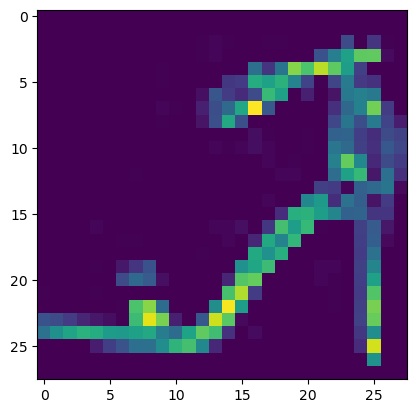

In [6]:
ImgIndex = 8
image = x_train[ImgIndex]
print("Image Label:", y_train[ImgIndex])
plt.imshow(image)

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
x_valid, x_train = x_train[:5000]/255.0, x_train[:5000]/255.0 
y_valid, y_train = y_train[:5000],  y_train[:5000]

In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics= ["accuracy"])

history = model.fit(x_train,y_train,epochs=30,
                   validation_data=(x_valid,y_valid))

Epoch 1/30
157/157 [==============================] - 3s 8ms/step - loss: 1.4060 - accuracy: 0.5960 - val_loss: 0.9698 - val_accuracy: 0.6886
Epoch 2/30
157/157 [==============================] - 1s 6ms/step - loss: 0.8462 - accuracy: 0.7294 - val_loss: 0.7926 - val_accuracy: 0.7298
Epoch 3/30
157/157 [==============================] - 1s 6ms/step - loss: 0.7144 - accuracy: 0.7612 - val_loss: 0.7011 - val_accuracy: 0.7578
Epoch 4/30
157/157 [==============================] - 1s 6ms/step - loss: 0.6455 - accuracy: 0.7884 - val_loss: 0.6146 - val_accuracy: 0.7974
Epoch 5/30
157/157 [==============================] - 1s 6ms/step - loss: 0.6001 - accuracy: 0.7968 - val_loss: 0.6128 - val_accuracy: 0.7910
Epoch 6/30
157/157 [==============================] - 1s 6ms/step - loss: 0.5687 - accuracy: 0.8134 - val_loss: 0.5635 - val_accuracy: 0.8170
Epoch 7/30
157/157 [==============================] - 1s 6ms/step - loss: 0.5390 - accuracy: 0.8196 - val_loss: 0.5471 - val_accuracy: 0.8158
Epoch 

In [14]:
new = x_test[:5]
predictions = model.predict(new)
predictions

1/1 [==============================] - 0s 103ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [16]:
classes = np.argmax(predictions,axis=1)
classes

array([9, 2, 1, 1, 6], dtype=int64)